###### Date: 09/07/2017
Author: Paulina Grunwald

## Udacity Data Analyst Nanodegree

# INTRO TO MACHINE LEARNING - EXPLORING ENRON DATASET

## Submission of poi.py python code

This is my submission of poi.py file. For ease of use (as suggested by the reviewer) I put all code in jupyter notebook. Hope it makes the review easier.

In [57]:
#!/usr/bin/python
import os
os.chdir('c:/Personal/GitHub/Udacity-Data-Analyst-Nanodegree/Project 5 -  Identify Fraud from Enron Email/Exercises/ud120-projects-master/final_project')

from IPython.display import Image
import matplotlib.pyplot as plt
import sys
import pickle
import pandas
import numpy
import numpy as np
import matplotlib.pyplot 
from sklearn import preprocessing
from time import time
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sys.path.append("../tools/")


from feature_format import featureFormat
from feature_format import targetFeatureSplit

#add POI to feature list
features_list = ["poi"]

#load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r") )

In [58]:
print str(data_dict["METTS MARK"])

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


In [59]:
#Count number of features
print "Number of features is:",(len(data_dict[(next(iter(data_dict)))]))


Number of features is: 21


In [60]:
#count how many POIs are there in the E+F dataset
count = 0
for i in range(len(data_dict)):
    a = data_dict.values()
    if a[i]['poi'] == True:
        count = count + 1        
print "Number of POIs in E+F dataset:", count

Number of POIs in E+F dataset: 18


In [61]:
poi_text = 'C:/Personal/GitHub/Udacity-Data-Analyst-Nanodegree/Project 5 -  Identify Fraud from Enron Email/Exercises/ud120-projects-master/final_project/poi_names.txt'
poi_names = open(poi_text, 'r')
line = poi_names.readlines()
count = len(line[2:])
print "Number of POIs in the poi_name.txt file:", count
poi_names.close()

Number of POIs in the poi_name.txt file: 35


In [62]:
#############OUTLIER CLEANING##################
#remove any outliers before proceeding further
outliers = ['TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E']
for outlier in outliers:
    data_dict.pop(outlier, 0)

In [63]:
#print number of employees after removal of the 3 outliers, it should be 143
print "Number of Enron employees after removing outliers:", len(data_dict.keys())

Number of Enron employees after removing outliers: 143


In [64]:
###############Display data using scatterplots of various combinations of features ####################
#print first highest salaries after removing of outliers
outliers = []
outliers_salary_count = {}
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))
    #Print salaries from  highest to lowest
outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:5])
print 'Print 5 highest salaries:',outliers_final

print '      '

#Print salaries from lowest to highest
outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=False)[:3])
print 'Print 3 lowest salaries:',outliers_final

Print 5 highest salaries: [('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037), ('WHALLEY LAWRENCE G', 510364)]
      
Print 3 lowest salaries: [('BANNANTINE JAMES M', 477), ('GRAY RODNEY', 6615), ('WESTFAHL RICHARD K', 63744)]


In [65]:
#Sort bonus data and view 3 highest and 3 lowest bonus values with the name of the Enron employee
outliers_bonus = []
outliers_bonus_final = {}
for key in data_dict:
    val = data_dict[key]['bonus']
    if val == 'NaN':
        continue
    outliers_bonus.append((key, int(val)))

outliers_bonus_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:3])
print 'Print 3 highest bonus:',outliers_bonus_final

outliers_bonus_final = (sorted(outliers,key=lambda x:x[1],reverse=False)[:3])
print 'Print 3 lowest bonus:',outliers_bonus_final

Print 3 highest bonus: [('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932)]
Print 3 lowest bonus: [('BANNANTINE JAMES M', 477), ('GRAY RODNEY', 6615), ('WESTFAHL RICHARD K', 63744)]


In [66]:
#count the number of NaN values for each feature (assuming max. number of items for each feature is 143)
def nan_values(data_dict):
    counts = dict.fromkeys(data_dict.itervalues().next().keys(), 0)
    for i in data_dict:
        employee = data_dict[i]
        for j in employee:
            if employee[j] == 'NaN':
                counts[j] += 1
    return counts

valid_values = nan_values(data_dict)
print valid_values


{'salary': 49, 'to_messages': 57, 'deferral_payments': 105, 'total_payments': 20, 'loan_advances': 140, 'bonus': 62, 'email_address': 32, 'restricted_stock_deferred': 126, 'total_stock_value': 18, 'shared_receipt_with_poi': 57, 'long_term_incentive': 78, 'exercised_stock_options': 42, 'from_messages': 57, 'other': 52, 'from_poi_to_this_person': 57, 'from_this_person_to_poi': 57, 'poi': 0, 'deferred_income': 95, 'expenses': 49, 'restricted_stock': 34, 'director_fees': 127}


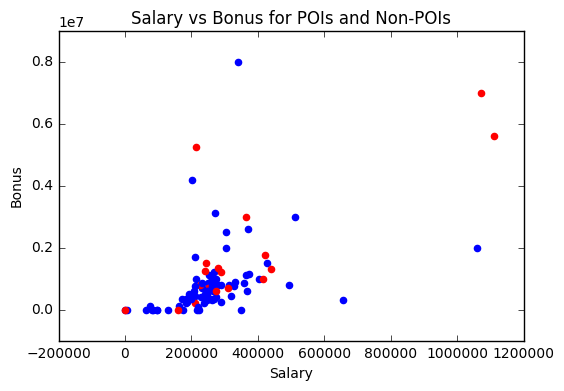

In [67]:
#plot bonus vs. salary and mark on red POIs
features = ["salary", "bonus", "poi"]
data = featureFormat(data_dict, features)

for item in data:
    #salary is first item in the feature list
    salary = item[0]
    #bonus is second item in the feature list
    bonus = item[1]
    #if 3rd frature "poi" is equal to 1 then that person will be marked as POI in red colour on the scatter plot
    if item[2] == 1:
        plt.scatter(salary, bonus, color = 'red')
    #if not "poi" then mark the person in blue
    else:
        plt.scatter(salary, bonus, color = 'blue')

plt.title('Salary vs Bonus for POIs and Non-POIs')
plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.show()

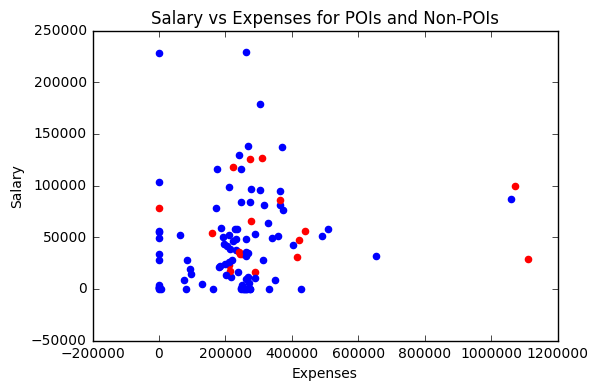

In [68]:
#plot expenses vs. salary and mark on red POIs
features = ["salary", "expenses", "poi"]
data = featureFormat(data_dict, features)

for item in data:
    #salary is first item in the feature list
    salary = item[0]
    #bonus is second item in the feature list
    bonus = item[1]
    #if 3rd frature "poi" is equal to 1 then that person will be marked as POI in red colour on the scatter plot
    if item[2] == 1:
        plt.scatter(salary, bonus, color = 'red')
    #if not "poi" then mark the person in blue
    else:
        plt.scatter(salary, bonus, color = 'blue')

plt.title('Salary vs Expenses for POIs and Non-POIs')
plt.ylabel("Salary")
plt.xlabel("Expenses")
plt.show()

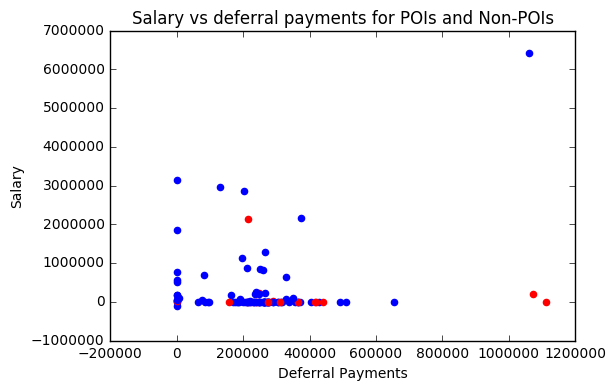

In [69]:
#plot deferral_payments vs. salary and mark on red POIs
features = ["salary", "deferral_payments", "poi"]
data = featureFormat(data_dict, features)

for item in data:
    #salary is first item in the feature list
    salary = item[0]
    #bonus is second item in the feature list
    bonus = item[1]
    #if 3rd frature "poi" is equal to 1 then that person will be marked as POI in red colour on the scatter plot
    if item[2] == 1:
        plt.scatter(salary, bonus, color = 'red')
    #if not "poi" then mark the person in blue
    else:
        plt.scatter(salary, bonus, color = 'blue')

plt.title('Salary vs deferral payments for POIs and Non-POIs')
plt.ylabel("Salary")
plt.xlabel("Deferral Payments")
plt.show()

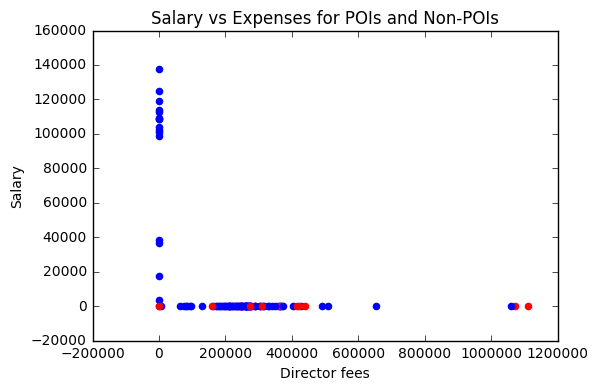

In [70]:
#plot salary vs. director_fees and mark on red POIs
features = ["salary", "director_fees", "poi"]
data = featureFormat(data_dict, features)

for item in data:
    #salary is first item in the feature list
    salary = item[0]
    #bonus is second item in the feature list
    bonus = item[1]
    #if 3rd frature "poi" is equal to 1 then that person will be marked as POI in red colour on the scatter plot
    if item[2] == 1:
        plt.scatter(salary, bonus, color = 'red')
    #if not "poi" then mark the person in blue
    else:
        plt.scatter(salary, bonus, color = 'blue')

plt.title('Salary vs Expenses for POIs and Non-POIs')
plt.ylabel("Salary")
plt.xlabel("Director fees")
plt.show()

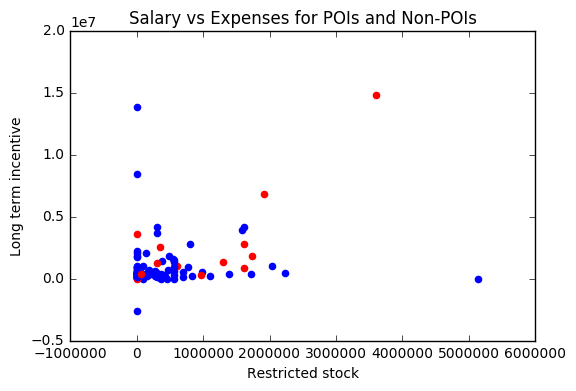

In [71]:
#plot long_term_incentive vs. restricted_stock and mark on red 
features = ["long_term_incentive", "restricted_stock", "poi"]
data = featureFormat(data_dict, features)

for item in data:
    #salary is first item in the feature list
    salary = item[0]
    #bonus is second item in the feature list
    bonus = item[1]
    #if 3rd frature "poi" is equal to 1 then that person will be marked as POI in red colour on the scatter plot
    if item[2] == 1:
        plt.scatter(salary, bonus, color = 'red')
    #if not "poi" then mark the person in blue
    else:
        plt.scatter(salary, bonus, color = 'blue')

plt.title('Salary vs Expenses for POIs and Non-POIs')
plt.ylabel("Long term incentive")
plt.xlabel("Restricted stock")
plt.show()

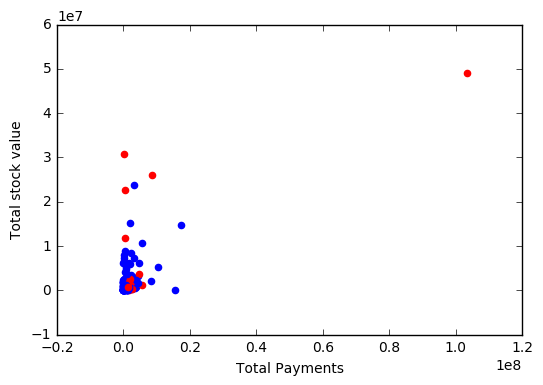

In [72]:
#plot total_payments vs. total_stock_value and mark on red 
features = ["total_payments", "total_stock_value", "poi"]
data = featureFormat(data_dict, features)


for point in data:
    payments = point[0]
    stock_value = point[1]
    if point[2] == 1:
        matplotlib.pyplot.scatter( payments, stock_value, color = 'red' )
    else:
        matplotlib.pyplot.scatter( payments, stock_value, color = 'blue' )

matplotlib.pyplot.xlabel("Total Payments")
matplotlib.pyplot.ylabel("Total stock value")
matplotlib.pyplot.show()

We can observe that one PO had very high total payments and high total stock value.

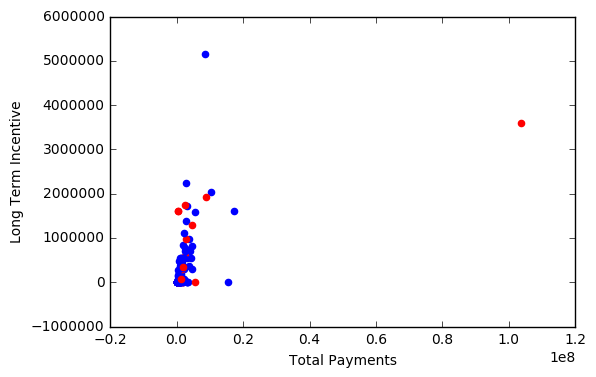

In [73]:
#plot total_payments vs. long_term_incentive and mark on red 
features = ["total_payments", "long_term_incentive", "poi"]
data = featureFormat(data_dict, features)


for point in data:
    payments = point[0]
    stock_value = point[1]
    if point[2] == 1:
        matplotlib.pyplot.scatter( payments, stock_value, color = 'red' )
    else:
        matplotlib.pyplot.scatter( payments, stock_value, color = 'blue' )

matplotlib.pyplot.xlabel("Total Payments")
matplotlib.pyplot.ylabel("Long Term Incentive")
matplotlib.pyplot.show()

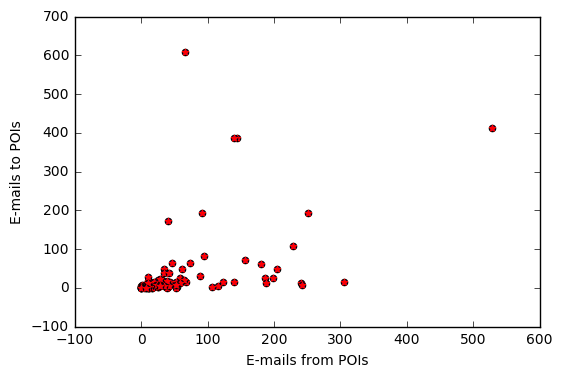

In [74]:
#plot from_poi_to_this_person vs. from_this_person_to_poi and mark on red 
data = featureFormat(data_dict, features)
features = ["from_poi_to_this_person", "from_this_person_to_poi", "poi"]
data = featureFormat(data_dict, features)

labels, features = targetFeatureSplit(data)

for i in data:
    from_poi = i[0]
    to_poi = i[1]
    plt.scatter( from_poi, to_poi )
    if point[2] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("E-mails from POIs")
plt.ylabel("E-mails to POIs")
plt.show()

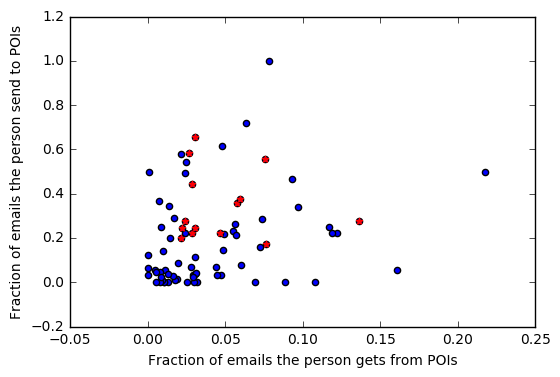

In [75]:
######################## Feature processing and creating new features################################################
#create new features fraction_to_poi_email and fraction_from_poi_email

def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

#create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

#insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1

features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email"]    
#store to my_dataset for easy export below

#these two lines extract the features specified in features_list
#and extract them from data_dict, returning a numpy array
data = featureFormat(data_dict, features_list)

#plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("Fraction of emails the person gets from POIs")
plt.ylabel("Fraction of emails the person send to POIs")
plt.show()

In [76]:
#financial features + poi + 3 email features + and 2 new features  'fraction_to_poi_email' and 'fraction_from_poi_email'
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 
                 'loan_advances', 'bonus', 'restricted_stock_deferred','deferred_income', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 
                 'exercised_stock_options', 'other', 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock',
                 'director_fees', 'to_messages', 'from_messages','from_this_person_to_poi', 'fraction_to_poi_email', 'fraction_from_poi_email' ] 

#runs scikit-learn's SelectKBest feature selection
#returns dict where keys=features, values=scores
def get_k_best(data_dict, features_list, k):
    data = featureFormat(data_dict, features_list)
    labels, features = targetFeatureSplit(data)

    k_best = SelectKBest(k=k)
    k_best.fit(features, labels)
    scores = k_best.scores_
    unsorted_pairs = zip(features_list[1:], scores)
    sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))
    k_best_features = dict(sorted_pairs[:k])
    print "{0} best features: {1}\n".format(k, k_best_features.keys())
    return k_best_features

print get_k_best(data_dict, features_list, 21)

21 best features: ['salary', 'to_messages', 'fraction_from_poi_email', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'director_fees', 'restricted_stock_deferred', 'total_stock_value', 'shared_receipt_with_poi', 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages', 'fraction_to_poi_email', 'other', 'from_this_person_to_poi', 'deferred_income', 'expenses', 'restricted_stock', 'long_term_incentive']

{'salary': 18.289684043404513, 'to_messages': 1.6463411294420076, 'fraction_from_poi_email': 3.1280917481567374, 'deferral_payments': 0.22461127473600989, 'total_payments': 8.7727777300916792, 'loan_advances': 7.1840556582887247, 'bonus': 20.792252047181535, 'director_fees': 2.1263278020077054, 'restricted_stock_deferred': 0.065499652909942141, 'total_stock_value': 24.182898678566879, 'shared_receipt_with_poi': 8.589420731682381, 'from_poi_to_this_person': 5.2434497133749582, 'exercised_stock_options': 24.815079733218194, 'from_messages': 0.1697009476217553

In [77]:
######################################## Algorithm Selection##########################################################################################
features_list = ["poi", "salary", "bonus", "fraction_from_poi_email",
                 "deferral_payments", "total_payments", "loan_advances", "restricted_stock_deferred", 
                 "total_stock_value", "expenses", "exercised_stock_options", "deferred_income",
                 "long_term_incentive", "shared_receipt_with_poi", "restricted_stock", 'director_fees']



In [78]:
data = featureFormat(data_dict, features_list)
#split into labels and features 
labels, features = targetFeatureSplit(data)
#split data into training and testing datasets
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)


In [79]:
##### DecisionTreeClassifier #####
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf_dt = DecisionTreeClassifier(min_samples_split=5)
clf_dt.fit(features_train,labels_train)
score = clf_dt.score(features_test,labels_test)
pred= clf_dt.predict(features_test)
print "DecisionTreeClassifier accuracy is", score
print "Decision tree algorithm time:", round(time()-t0, 3), "s"


DecisionTreeClassifier accuracy is 0.8
Decision tree algorithm time: 0.003 s


In [80]:
### Rescale each feature
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

### Set the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.set_params(min_samples_split=2)
from sklearn.pipeline import Pipeline
clf = Pipeline(steps=[('minmaxer', min_max_scaler), ('clf', clf)])

In [42]:
##### GaussianNB #####
#use GaussianNB algorithm to predict accuracy and time
t0 = time()
clf_g = GaussianNB()
clf_g.fit(features_train, labels_train)
pred = clf_g.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print "GaussianNB accuracy is", accuracy
print "GaussianNB algorithm time:", round(time()-t0, 3), "s"

GaussianNB accuracy is 0.266666666667
GaussianNB algorithm time: 0.003 s


In [43]:
# use KNeighbors algorithm to predict accuracy and time
t0 = time()
clf_kn = KNeighborsClassifier(n_neighbors=5, weights='uniform', leaf_size=100)
clf_kn.fit(features_train,labels_train)
score = clf_kn.score(features_test,labels_test)
pred= clf_kn.predict(features_test)
print 'Accuracy(using KMeans)', score
print "KMeans time:", round(time()-t0, 3), "s"



Accuracy(using KMeans) 0.8
KMeans time: 0.007 s


In [44]:
##### AdaBoost#####
#Use AdaBoost algorithm
t0 = time()
clf_ab = AdaBoostClassifier(n_estimators=150)
clf_ab.fit(features_train,labels_train)
score = clf_ab.score(features_test,labels_test)
pred= clf_ab.predict(features_test)
print 'Accuracy(using Adaboost)', score
print "Decision tree algorithm time:", round(time()-t0, 3), "s"

Accuracy(using Adaboost) 0.8
Decision tree algorithm time: 0.413 s


In [81]:
############ Validation and Performance of the algorithm############
feature_list = ['poi', 'shared_receipt_with_poi', 'fraction_to_poi_email']

In [82]:
#extract features_list from the dataset
data = featureFormat(data_dict, feature_list)
#split into labels and features 
labels, features = targetFeatureSplit(data)

#deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, 
                                                                labels, test_size=0.1, random_state=42)

In [83]:
#use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]
    
    #Deploy first (Overfit) POI Identifier
    from sklearn.tree import DecisionTreeClassifier
    t0 = time()
    clf_f1 = DecisionTreeClassifier()
    clf_f1.fit(features_train,labels_train)
    score = clf_f1.score(features_test,labels_test)
    print 'Accuracy before tuning ', score
    print "Decision tree algorithm time:", round(time()-t0, 3), "s"
    


Accuracy before tuning  0.758620689655
Decision tree algorithm time: 0.001 s
Accuracy before tuning  0.689655172414
Decision tree algorithm time: 0.001 s
Accuracy before tuning  0.892857142857
Decision tree algorithm time: 0.0 s


In [49]:
#tune decision tree algorithm 
t0 = time()
clf_f = DecisionTreeClassifier(criterion='gini', class_weight='balanced',
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
clf_f = clf_f.fit(features_train,labels_train)
pred = clf_f.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acccuracy=accuracy_score(labels_test, pred)
print "accuracy after tuning = ", acccuracy

done in 0.003s
accuracy after tuning =  0.892857142857


In [50]:
#The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
print 'Precision is equal to', precision_score(labels_test,pred)

Precision is equal to 0.5


In [51]:
#The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
#The recall is intuitively the ability of the classifier to find all the positive samples.
print 'Recall is equal to', recall_score(labels_test,pred)

Recall is equal to 1.0


In [54]:
### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf_f, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )